In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image
%matplotlib inline
import seaborn as sns
import plotly.express as px

from IPython.display import display, Markdown

# World Cup Penalty Shootouts

Qatar 2022 was the last edition of FIFA World Cup, undoubtedly it was one the best tournament ever, this edition stood out due to fully of emotions, incredible matches, many surprises in whole stages and the cup returned again to South America twenty years later, achievement made by Argentina in the penalty shootout modality. In the following study we are going to analyze the penalties shootouts on knockout stage throughout the history World Cup, being the first event in Spain 82.

In [2]:
# Downland the csv from Kaggle
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/luigibizarro/world-cup-penalty-shootouts-1982-2022'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/luigibizarro/world-cup-penalty-shootouts-1982-2022


100%|██████████| 1.92k/1.92k [00:00<00:00, 540kB/s]

In [3]:
# Check the file is inside
import os

data_dir = './world-cup-penalty-shootouts-1982-2022'
os.listdir(data_dir)

['WorldCupShootouts.csv']

In [4]:
WC_Shootouts = pd.read_csv('.//world-cup-penalty-shootouts-1982-2022/WorldCupShootouts.csv')

WC_Shootouts 

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
349,35,ARG,7.0,R,L,1.0,1.0,6,0.0
350,35,FRA,2.0,R,L,1.0,1.0,7,1.0
351,35,ARG,7.0,R,R,1.0,1.0,8,1.0
352,35,FRA,NaN,NaN,NaN,NaN,NaN,9,NaN


The original dataset was extracted from Kaggle but this will be modified adding the five last penalties shootout belong to Qatar 2022 in order to make an analyze more complete, respecting three conditions given by the original DataFrame:

- 1. In each penalty shootout, the Penalty_Number = 1 depicts to the country which kick first.
- 2. All penalties shootout have at least 10 penalties or more hence any rows could have empty values
- 3. 'Penalty_Number' always ends in even number due to all teams have the same chances to kick.

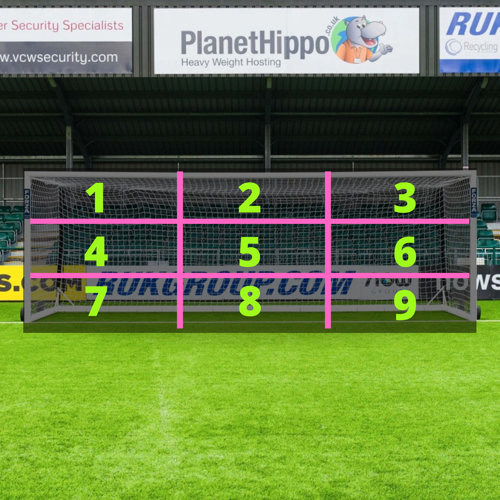

In [5]:
# Picture of al zone shoots

Image.open('Goal.png','r').resize((500,500))

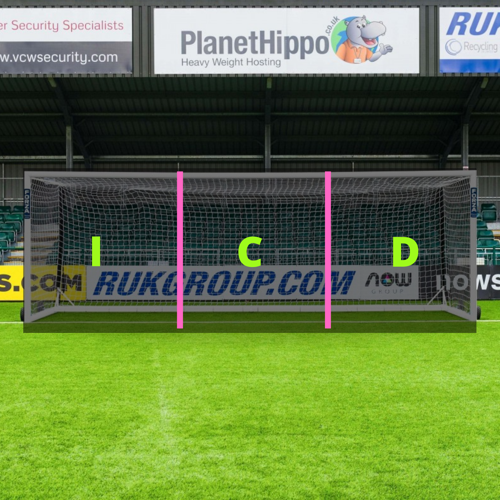

In [6]:
# Picture of al keeper dives

Image.open('Keeper.png','r').resize((500,500))

In [7]:
# Rename any columns

WC_Shootouts.rename({'Game_id': 'Game ID', 'Penalty_Number': '# Penalty', 'Elimination':'Match Point'}, axis=1, inplace=True)
WC_Shootouts

,Game ID,Team,Zone,Foot,Keeper,OnTarget,Goal,# Penalty,Match Point
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
349,35,ARG,7.0,R,L,1.0,1.0,6,0.0
350,35,FRA,2.0,R,L,1.0,1.0,7,1.0
351,35,ARG,7.0,R,R,1.0,1.0,8,1.0
352,35,FRA,NaN,NaN,NaN,NaN,NaN,9,NaN


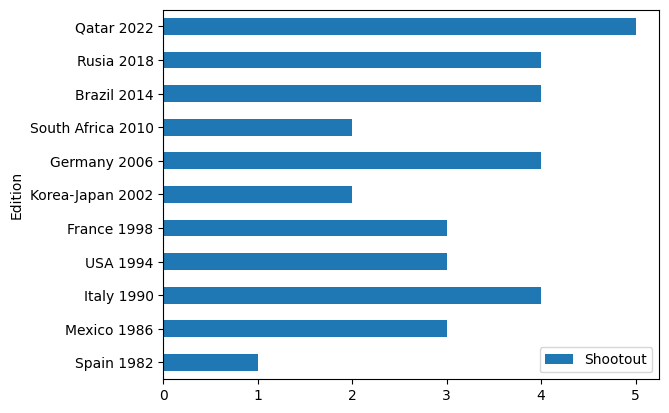

In [8]:
# Graph that show us the amount penalty shootouts for each edition

import matplotlib.pyplot as plt
edition_WC = {
    'Edition':   ['Spain 1982', 'Mexico 1986', 'Italy 1990', 'USA 1994', 'France 1998', 'Korea-Japan 2002',
                  'Germany 2006', 'South Africa 2010', 'Brazil 2014', 'Rusia 2018', 'Qatar 2022'], # host - year
    'Shootout': [1,3,4,3,3,2,4,2,4,4,5] # amount penalty shootouts
                }

edition_WC = pd.DataFrame(edition_WC)
edition_WC.plot.barh(x='Edition', y='Shootout');

In [10]:
# We create a dataframe edition 

def Editions(edition, WC):
    count = edition_WC['Shootout'][0]
    num = 0
    Edition = []
    for i in range(len(pd.Series(WC['Game ID']))):
        if WC['Game ID'][i] <= count:
            Edition.append(edition['Edition'][num])
        else:
            num += 1
            Edition.append(edition['Edition'][num])
            count += edition['Shootout'][num]
    return(pd.DataFrame(Edition))

Edition = Editions(edition_WC, WC_Shootouts)
# Edition

# and to add to WC_Shootouts

WC_Shootouts['Editions'] = Edition
WC_Shootouts.insert(0, 'Editions', WC_Shootouts.pop('Editions'))

WC_Shootouts

,Editions,Game ID,Team,Zone,Foot,Keeper,OnTarget,Goal,# Penalty,Match Point
0,Spain 1982,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,Spain 1982,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,Spain 1982,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,Spain 1982,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,Spain 1982,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...,...
349,Qatar 2022,35,ARG,7.0,R,L,1.0,1.0,6,0.0
350,Qatar 2022,35,FRA,2.0,R,L,1.0,1.0,7,1.0
351,Qatar 2022,35,ARG,7.0,R,R,1.0,1.0,8,1.0
352,Qatar 2022,35,FRA,NaN,NaN,NaN,NaN,NaN,9,NaN


It would stay like that, this Data Frame will be useful for the analyses. Let's pick up one row in order to understand the meaning of each one.

In [11]:
WC_Shootouts.loc[[50]]

,Editions,Game ID,Team,Zone,Foot,Keeper,OnTarget,Goal,# Penalty,Match Point
50,Italy 1990,5,ROM,7.0,R,L,1.0,0.0,9,0.0


The penalty shootout was in edition Italy 90 **(Edition)** belongs to the fifth penalty shootout **(Game ID)** in the history World Cup ever, Romania **(Team)** was one of countries in that definition, its player was left-footed **(Foot)** and shot in Zone 7 **(Zone)** , the goalkeeper dived to the left **(Keeper)**. The penalty kick went into the soccer goal **(OnTarget = 1.0)** but the goalkeeper saved it **(Goal = 0.0)**. It happened in penalty number nine **(# Penalty)** from that penalty shootout and the shot didn't define the match **(Match Point = 0.0)**.

Perfect! Let's start finding out some features.

## First Exploratory Analysis 

### 1. Amount and average goals

In [12]:
amount_goals = int(WC_Shootouts['Goal'].sum())  ### Total goals
amount_shoots = int(WC_Shootouts['Goal'].count()) ### Total shots
display(Markdown('#### The amount total goals is {} '.format(amount_goals) +'of {} '.format(amount_shoots) + 'shoots'))

#### The amount total goals is 221 of 320 shoots

In [13]:
average_goals = WC_Shootouts['Goal'].sum() / len(WC_Shootouts.groupby('Game ID')[['Goal']].sum()) ## average goals in each shootout

display(Markdown('#### The average goals is {}'.format(round(average_goals, 3))))

#### The average goals is 6.314

### 2. Top 5 countries with the most goals score

In [14]:
WC_Shootouts.groupby('Team')[['Goal']].sum().sort_values('Goal', ascending=False).head(5)

,Goal
Team,
ARG,25.0
GER,17.0
FRA,17.0
BRA,15.0
CRO,14.0


### 3. Number of penalties out, saved and scored

To respond this query we must to have three considerations:

If the penalty kick taken went out then OnTarget = 0 and Goal = 0, therefore OnTarget + Goal = 0
If the penalty kick was saved for the goalkeeper then OnTarget = 1 and Goal = 0, therefore OnTarget + Goal = 1
If the penalty kick was goal then OnTarget = 1 and Goal = 1, therefore OnTarget + Goal = 2

In [15]:
Out = WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 0]
Saved = WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 1]
Score = WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 2]

In [16]:
out = len(WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 0])
p_Out = round((len(Out) / (len(Out) + len(Saved)+ len(Score))*100), 2)
display(Markdown('#### The amount of penalties that went out is {} '.format(out) + 'and its probability is {}'.format(p_Out) + '%'))

#### The amount of penalties that went out is 28 and its probability is 8.75%

In [17]:
saved = len(WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 1])
p_Saved = round((len(Saved) / (len(Out) + len(Saved) + len(Score))*100), 2)
display(Markdown('#### The amount of penalties saved to goalkeeper is {} '.format(saved) + 'and its probability is {}'.format(p_Saved) + '%'))

#### The amount of penalties saved to goalkeeper is 71 and its probability is 22.19%

In [18]:
score = len(WC_Shootouts[WC_Shootouts['OnTarget'] + WC_Shootouts['Goal'] == 2])
p_Score = round((len(Score) / (len(Out) + len(Saved) + len(Score))*100), 2)
display(Markdown('#### The amount of penalties scored is {} '.format(score) + 'and its probability is {}'.format(p_Score) + '%'))

#### The amount of penalties scored is 221 and its probability is 69.06%

### 4. Number of players left-footed, players right-footed and their success ratio

In [19]:
lfoot = WC_Shootouts[WC_Shootouts.Foot == 'L']
p_lfoot = round(lfoot['Goal'].mean()*100, 2)
display(Markdown('#### The amount of penalties kicked from players left-footed is {} '.format(len(lfoot)) + 'with a success ratio {}'.format(p_lfoot) + '%'))

#### The amount of penalties kicked from players left-footed is 64 with a success ratio 67.19%

In [20]:
rfoot = WC_Shootouts[WC_Shootouts.Foot == 'R']
p_rfoot = round(rfoot['Goal'].mean()*100, 2)
display(Markdown('#### The amount of penalties kicked from players right-footed is {} '.format(len(rfoot)) + 'with a success ratio {}'.format(p_rfoot) + '%'))

#### The amount of penalties kicked from players right-footed is 256 with a success ratio 69.53%

### 5. Goalkeeper's choice dive

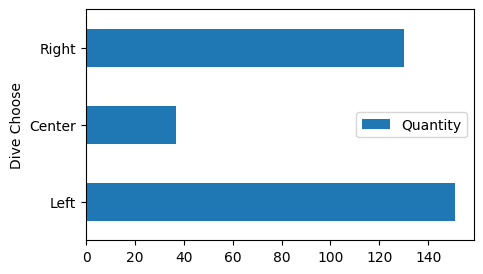

In [21]:
left_dive = len(WC_Shootouts[WC_Shootouts.Keeper == 'L'])
center_dive = len(WC_Shootouts[WC_Shootouts.Keeper == 'C'])
right_dive = len(WC_Shootouts[WC_Shootouts.Keeper == 'R'])

dives = {
    'Dive Choose': ['Left', 'Center', 'Right'],
    'Quantity': [left_dive, center_dive ,right_dive]
}

dives = pd.DataFrame(dives)
dives.plot.barh(x='Dive Choose', y='Quantity', figsize=(5,3));

In [22]:
p_left_dive= round((left_dive / (left_dive + center_dive + right_dive)*100) , 2)
display(Markdown('#### The goalkeeper gets dive to left the {} '.format(p_left_dive) + '%'))

#### The goalkeeper gets dive to left the 47.48 %

In [23]:
p_right_dive = round((right_dive / (left_dive + center_dive + right_dive)*100) , 2)
display(Markdown('#### The goalkeeper gets dive to right the {} '.format(p_right_dive) + '%'))

#### The goalkeeper gets dive to right the 40.88 %

After exploring the data, we can draw some conclusions:

- 1. The average number of goals in each penalty shootout is somewhat above 6 (6,257...) out of ten possible. We can conclude that it barely manages to score more than half of the penalties allowed.

- 2. The country with the most goals is Argentina with 25 scores, followed for Germany and France with 17 each one, Brazil and Croatia complete the top five with 15 goals respectively. This allow us to infer that Argentina is a greater participation in this kind definition modalities, statement what we will try to find out in the next section.

- 3. The 68.87% of kicks are turned into in goal, the 22.33 % are saved for the goalkeeper and the 8.81% don't go to goal soccer. According to research less than 70% of penalties are successful due to the mixed of the skill kickers, if we take our study like a sample, there is too much overlap.

- 4. t doesn't exist too much difference in success ratio between players left-footed and right-footed, around the 68% for both cases.

- 5. The goalkeeper chooses to dive either left or right in around 88% of the time. It's not bad idea kick in the middle.

## Asking and Answering Questions

Let's deep in the data put in specific questions in order to find out any outcomes on penalties shootout.

### Q1 What is the most player's choice zone?

We will try to find out what is the zone more chosen throughout the World Cup history, for that we are going to create a code which store the amount of shots for each zone. First we are going to compute out the goal's ratio and quantity of goals for each zone.

In [24]:
Zone = {
    'Quantity': WC_Shootouts.groupby('Zone')['Goal'].sum(),
    'Mean': WC_Shootouts.groupby('Zone')['Goal'].mean()
}

pd.DataFrame(Zone)

,Quantity,Mean
Zone,,
1.0,22.0,0.758621
2.0,13.0,0.619048
3.0,14.0,0.875000
4.0,30.0,0.714286
5.0,14.0,0.666667
6.0,28.0,0.736842
7.0,51.0,0.629630
8.0,14.0,0.636364
9.0,35.0,0.700000


In this table we can see the quantity of goals taken in each zone and near its success rate, the side most elected the **Zone 7** it is one less effective with 62%, instead the **Zone 3** has 87,5% effective. It seems the better places is located in the **Zone 1** and **Zone 3**, namely in the corners

In [25]:
def Pick_Up(overall): # function for take numbers when changes its value of any variable
    catch = [i+1 for i in range(len(overall)-1) if overall[i] != overall[i+1]]
    catch.insert(0, 0)
    catch.append(len(overall))    # In this case: 'Editions'
    return(catch)
pick_edition = Pick_Up(WC_Shootouts['Editions'])
# pick_edition

def Goal_Zone(p_ed): # According to the numbers of pick_edition, we save the sum of goals in each zone to each editions. 
    matrix_goal = []
    for i in range(len(p_ed)-1):
        goal_acum = [(WC_Shootouts[p_ed[i]:p_ed[i+1]]['Zone'] == j).sum() for j in range(1,len(WC_Shootouts.groupby('Zone'))+1)]
        matrix_goal.append(goal_acum)                                            # range(Zone 1, Zone 10)     
    return(matrix_goal) # It returns a matrix
goal_zone = Goal_Zone(pick_edition) 
# goal_zone

def TableZones(array):

    array = pd.DataFrame(array)

    Edition = ['Spain 1982', 'Mexico 1986', 'Italy 1990', 'USA 1994', 'France 1998', 'Korea-Japan 2002',
                 'Germany 2006', 'South Africa 2010', 'Brazil 2014', 'Rusia 2018', 'Qatar 2022']
    Zones = ['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', 'Zona 7', 'Zona 8', 'Zona 9']

    array.columns = [Zones]
    array['Editions'] = Edition
    array.insert(0, 'Editions', array.pop('Editions'))
    return(array)

editions_zones = TableZones(goal_zone)
editions_zones # Finally we get a DF

,Editions,Zona 1,Zona 2,Zona 3,Zona 4,Zona 5,Zona 6,Zona 7,Zona 8,Zona 9
0,Spain 1982,0,1,1,1,0,1,2,1,5
1,Mexico 1986,5,1,0,4,2,3,7,3,2
2,Italy 1990,5,1,2,5,1,7,9,4,4
3,USA 1994,1,6,1,6,2,3,3,0,7
4,France 1998,5,2,1,2,3,4,6,0,5
5,Korea-Japan 2002,0,2,3,1,3,4,2,2,2
6,Germany 2006,4,2,2,4,2,3,9,1,6
7,South Africa 2010,3,2,1,1,1,2,2,3,3
8,Brazil 2014,3,2,3,7,2,3,6,2,8
9,Rusia 2018,2,0,2,5,2,3,17,4,4


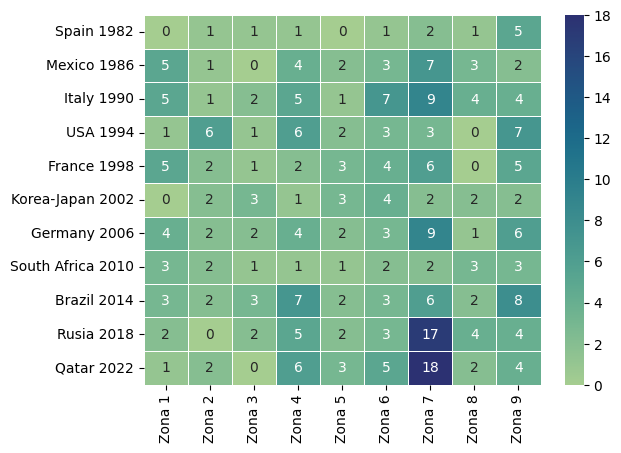

In [26]:
Editions = ['Spain 1982', 'Mexico 1986', 'Italy 1990', 'USA 1994', 'France 1998', 'Korea-Japan 2002',
            'Germany 2006', 'South Africa 2010', 'Brazil 2014', 'Rusia 2018', 'Qatar 2022']
Zones = ['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4', 'Zona 5', 'Zona 6', 'Zona 7', 'Zona 8', 'Zona 9']
map_zones = pd.DataFrame(goal_zone, index=Editions, columns=Zones)

sns.heatmap(map_zones, cmap="crest", linewidth=.5, annot=True);

We notice that **Zone 7** in the most chosen places, in the two last World Cups around the middle of shots went to this zone. In the beginning of the definitions the **Zone 1** was one the more sides taken however it is downside. The **Zone 4** and **Zone 9** are the more regular, in overall always has shots that going in there.

### Q2 What is the most player's choice zone according to skilful foot?

Now we're goint to create a dataframe which respresents the amount of shots acoording to skiful foot

In [27]:
# Group by 'Zone' and 'Foot' 
zone_L_R = WC_Shootouts.groupby(['Zone', 'Foot'])['Editions'].count() # it could take any column instead "Editions"
#zone_L_R

In [28]:
def Zone_Foot(zoneLR):

    shot_left = [zoneLR.iloc[num] for num in range(0, len(zoneLR), 2)]  
    shot_right = [zoneLR.iloc[num] for num in range(1, len(zoneLR), 2)]
    
    Zone_Left_Right = {
        'Zone':  Zones,
        'Left Foot': shot_left,
        'Right Foot': shot_right
    }

    return(pd.DataFrame(Zone_Left_Right))

ZoneLR = Zone_Foot(zone_L_R)
ZoneLR

,Zone,Left Foot,Right Foot
0,Zona 1,3,26
1,Zona 2,2,19
2,Zona 3,5,11
3,Zona 4,8,34
4,Zona 5,4,17
5,Zona 6,7,31
6,Zona 7,12,69
7,Zona 8,9,13
8,Zona 9,14,36


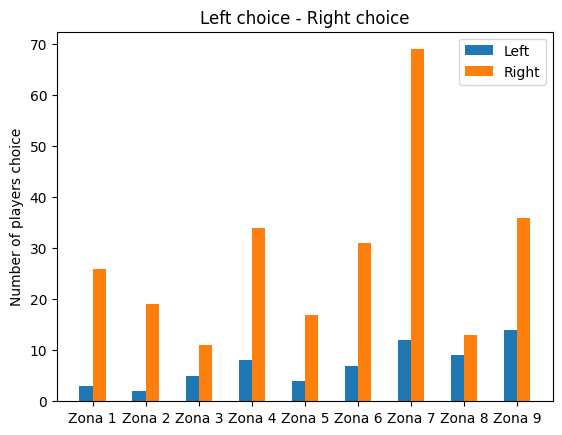

In [29]:
zone = ZoneLR['Zone']
l = ZoneLR['Left Foot']
r = ZoneLR['Right Foot']

x = np.arange(len(zone))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, l, width, label='Left')
rects2 = ax.bar(x + width/2, r, width, label='Right')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of players choice')
ax.set_title('Left choice - Right choice')
ax.set_xticks(x)
ax.set_xticklabels(zone)
ax.legend()

The difference between the amount of kicks is bigger because the majority of player are right-footed. The **Zone 8** is a place with less difference, otherwise in **Zone 7** is the place more elected for the right-footed than left-footed. Next we will build a more precise table

In [30]:
zone_success = WC_Shootouts.groupby(['Zone', 'Foot'])['Goal'].sum()

def Zone_Goal(zoneLR, zonegoal):

    shot_left = [zoneLR.iloc[num] for num in range(0, len(zoneLR), 2)]  
    shot_right = [zoneLR.iloc[num] for num in range(1, len(zoneLR), 2)]

    goal_left = [int(zonegoal.iloc[num]) for num in range(0, len(zonegoal), 2)]  
    goal_right = [int(zonegoal.iloc[num]) for num in range(1, len(zonegoal), 2)]
    
    Zone_Goal_Left_Right = {
        'Zone':  Zones,
        'Goal Left': goal_left,
        'Left Foot': shot_left,
        'Goal Right': goal_right,
        'Right Foot': shot_right        
    }

    return(pd.DataFrame(Zone_Goal_Left_Right))

Table_Zone = Zone_Goal(zone_L_R, zone_success)
Table_Zone 

,Zone,Goal Left,Left Foot,Goal Right,Right Foot
0,Zona 1,2,3,20,26
1,Zona 2,1,2,12,19
2,Zona 3,5,5,9,11
3,Zona 4,6,8,24,34
4,Zona 5,4,4,10,17
5,Zona 6,4,7,24,31
6,Zona 7,8,12,43,69
7,Zona 8,5,9,9,13
8,Zona 9,8,14,27,36


It's complicated to infer about the players left-footed due to lower amount taken and goals, otherwise for players right-footed. Next we will take a rearrangement of the ratios for a better comparison.

In [31]:
Table_Zone['Ratio Left'] = Table_Zone['Goal Left'] / Table_Zone['Left Foot']
Table_Zone['Ratio Right'] = Table_Zone['Goal Right'] / Table_Zone['Right Foot']

Table_Zone[['Zone', 'Goal Left', 'Left Foot', 'Ratio Left', 'Goal Right', 'Right Foot', 'Ratio Right']]


,Zone,Goal Left,Left Foot,Ratio Left,Goal Right,Right Foot,Ratio Right
0,Zona 1,2,3,0.666667,20,26,0.769231
1,Zona 2,1,2,0.500000,12,19,0.631579
2,Zona 3,5,5,1.000000,9,11,0.818182
3,Zona 4,6,8,0.750000,24,34,0.705882
4,Zona 5,4,4,1.000000,10,17,0.588235
5,Zona 6,4,7,0.571429,24,31,0.774194
6,Zona 7,8,12,0.666667,43,69,0.623188
7,Zona 8,5,9,0.555556,9,13,0.692308
8,Zona 9,8,14,0.571429,27,36,0.750000


To left-footed is more convenient kick towards the Zone 3, 4 and 5, however the Zones 6 to 9 (those more chosen for the right-footed) is not a good idea. We can notice only two kicks went to Zone 1, maybe it's a zone less comfortable to kick for player whit this features. Let's compare both ratios in a graph:

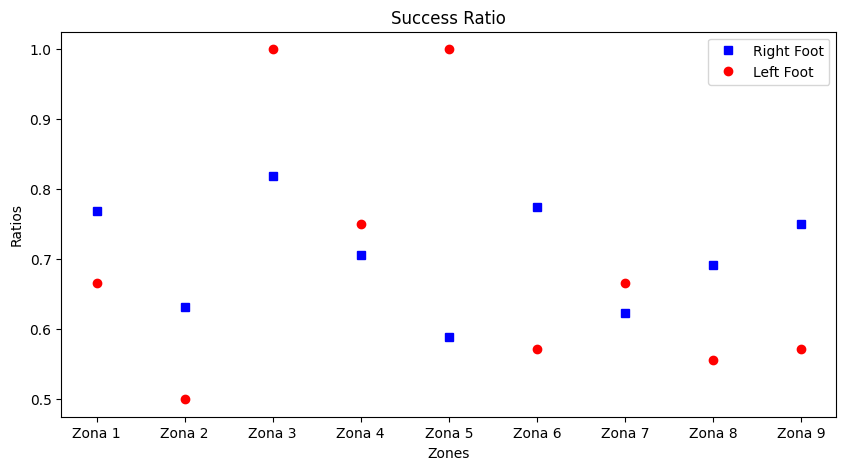

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(Table_Zone['Zone'], Table_Zone['Ratio Right'], 'sb')
plt.plot(Table_Zone['Zone'], Table_Zone['Ratio Left'], 'or')

plt.xlabel('Zones')
plt.ylabel('Ratios')

plt.title("Success Ratio")
plt.legend(['Right Foot', 'Left Foot']);

In this case to right-footed is more convenient kick towards the Zone 1, 3, 6, and 8.Therefore this kind of players are more versatile and more successful since their worst ratio (Zone 5) is almost 59% and it is greater than four ratios from the left-footed.

### Q3 History penalty shootout's score. Does first team have more chances to win?

Next we show all the scores of the penalties shootout and how many 'Match Points' took to finish each penalty shootout

In [33]:
pick_ID = Pick_Up(WC_Shootouts['Game ID']) # pick up when a 'Game ID' value change, furtheremore get append 0 and 352
pick_ID

def rename (name): # rename de the name of countries
    countries = ['Argentina (ARG)', 'Brazil (BRA)','Spain (SPA)','France (FRA)','Croatia (CRO)','England (ENG)','Germany (GER)',
                 'Italy (ITA)','Costa Rica (CRA)','Ireland (IRE)','Japan (JAP)','Mexico (MEX)','Rusia (RUS)',
                 'Belgium (BEL)','Bulgaria (BUL)','Chile (CHI)','Colombia (COL)','Denmark (DEN)','Ghana (GHA)','Greece (GRE)',
                 'Korea (KOR)','Morocco (MAR)','Netherlands (NED)','Paraguay (PAR)','Portugal (POR)','Romania (RUM)',
                 'Romania (ROM)','Sweeden (SWE)','Switzerland (SWZ)','Ukarine (UKR)','Uruguay (URU)','Yugoslavia (YUG)']

    for i in countries:
        if i.__contains__(name):
            return(i)
        
      
def Show_Score(array, Edition, Team, Goal, Penalty, MP):

    editions = [Edition[array[k]] for k in range (len(pick_ID)-1)] # take editions
    
    A = [rename(Team[array[i]]) for i in range(len(array)-1)] # rename ABC for Abecedario
    B = [rename(Team[array[i]+1]) for i in range(len(array)-1)]

    score_A = [int(sum(Goal[j] for j in range(array[i], array[i+1]) # sum of goals from team A
                     if (Goal.notnull().loc[j] and Penalty[j] % 2 != 0.0))) for i in range(len(array)-1)]

    score_B = [int(sum(Goal[j] for j in range(array[i], array[i+1]) # sum of goals from team B
                     if (Goal.notnull().loc[j] and Penalty[j] % 2 == 0.0))) for i in range(len(array)-1)]

    match_points = [int(MP[array[l]:array[l+1]].sum()) for l in range (len(array)-1)] # amount of match points
    
    Matches = {
        'Editions' : editions, 'Team A': A, 'Score A': score_A, 'Score B': score_B, 'Team B': B, '# Match Point': match_points
        }

    return(pd.DataFrame(Matches))

Penalty_History = Show_Score(pick_ID,WC_Shootouts['Editions'],  WC_Shootouts['Team'], 
                             WC_Shootouts['Goal'], WC_Shootouts['# Penalty'], WC_Shootouts['Match Point'])

Penalty_History

,Editions,Team A,Score A,Score B,Team B,# Match Point
0,Spain 1982,France (FRA),4,5,Germany (GER),2
1,Mexico 1986,Brazil (BRA),3,4,France (FRA),1
2,Mexico 1986,Germany (GER),4,1,Mexico (MEX),1
3,Mexico 1986,Spain (SPA),4,5,Belgium (BEL),2
4,Italy 1990,Romania (ROM),4,5,Ireland (IRE),1
5,Italy 1990,Argentina (ARG),3,2,Yugoslavia (YUG),1
6,Italy 1990,Italy (ITA),3,4,Argentina (ARG),1
7,Italy 1990,England (ENG),2,4,Germany (GER),1
8,USA 1994,Mexico (MEX),1,3,Bulgaria (BUL),1
9,USA 1994,Sweeden (SWE),5,4,Romania (ROM),2


In [34]:
def First_Shooter(PH):
    count = 0
    for i in range(len(PH)):
        if PH['Score A'][i] > PH['Score B'][i]:
            count += 1
    num = round(count/len(PH)*100, 2)
    return(count, num)

p_FirstShooter = First_Shooter(Penalty_History)

display(Markdown('#### There were {} '.format(p_FirstShooter[0]) + 'which started kicking and won,' + ' corresponds to {}'.format(p_FirstShooter[1]) + '%'))

#### There were 17 which started kicking and won, corresponds to 48.57%

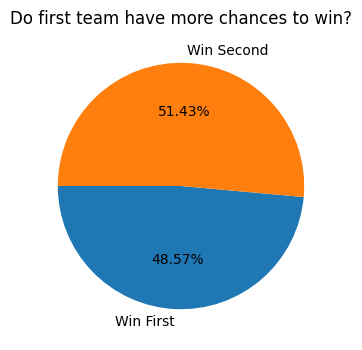

In [35]:
plt.figure(figsize=(8,4))
plt.title('Do first team have more chances to win?')
plt.pie((p_FirstShooter[0],len(Penalty_History)-p_FirstShooter[0]), labels=('Win First','Win Second'), autopct='%1.2f%%', startangle=180);

In opposition of the penalty shootout history, we can see that first team taken win less than half. In fact the second team gets  a little advantage.

### Q4 Countries with most appearances

In [36]:
def MoreAppear(PH):
    countries = pd.concat([PH['Team A'], PH['Team B']], ignore_index=True, sort=False) # join both columns
    appear = pd.Series(np.ones(len(PH['Team A']) + len(PH['Team B']))) # the each Team gets assign 1 to count late

    Table = {
        'Countries': countries,
        'Appears': appear
        }

    more_appear = pd.DataFrame(Table)
    return(more_appear.groupby('Countries')[['Appears']].count().reset_index()) #.reset_index adds indexes to DF

MostAppear = MoreAppear(Penalty_History)

#MostAppear

We make a pie chart and one dataframe

In [49]:
figMA = px.pie(MostAppear, values=MostAppear['Appears'], names=MostAppear['Countries'].unique(),
             color =MostAppear['Countries'].unique())
figMA.update_traces(textposition='inside',
                  textinfo='value+label',
                  sort=True)
figMA.update_layout(width=850, height=720)
figMA.show()

In [39]:
def MoreWIN(PH):
    countries = [PH['Team A'][i] if PH['Score A'][i] > PH['Score B'][i] else PH['Team B'][i] for i in range(len(PH))]

    Table = {
        'Countries' : countries,
        'Win' : np.ones(len(countries)).astype(int)
        }

    return(pd.DataFrame(Table).groupby('Countries')[['Win']].sum())

MoreWin = MoreWIN(Penalty_History)

MostAppearWin = MostAppear.merge(MoreWin, on ='Countries', how='left')
MostAppearWin[MostAppearWin.Appears >= 3].sort_values(by='Appears', ignore_index=True, ascending=False).sort_values(by='Win', ignore_index=True, ascending=False)

,Countries,Appears,Win
0,Argentina (ARG),7,6.0
1,Croatia (CRO),4,4.0
2,Germany (GER),4,4.0
3,Brazil (BRA),5,3.0
4,France (FRA),5,2.0
5,Spain (SPA),5,1.0
6,England (ENG),4,1.0
7,Italy (ITA),4,1.0
8,Netherlands (NED),4,1.0


This bar pie show us the countries which were at least one penalty shootout, we can notice that Argentina is the greater winner country with 6 victories of 7 matches. Germany and Croatia were four times and they won all their definitions. Brazil, France and Spain were five times but the South American country won 3, France won 2 and Spain 1 having one the worst records ever, same about Italy, England, Germany and Netherlands they played 4 and won only one.

### Q5 Amount of penalties shootouts incompleted

In [40]:
def PS_Finished(overall_MP, overall_ID):
    catch_ID = [WC_Shootouts['Game ID'][i] for i in range(len((overall_MP))) if overall_MP.isnull().loc[i]]
    catch_ID = set(catch_ID)
    return(len(catch_ID))

not_finish = PS_Finished(WC_Shootouts['Match Point'], WC_Shootouts['Game ID'])
p = round(not_finish/len(Penalty_History)*100, 3)

display(Markdown('#### The World Cup History had {}'.format(len(Penalty_History)) + ' penalties shootout and {}'.format(not_finish) +
                 ' were not completed, namely around {} '.format(p)+ '%'))

#### The World Cup History had 35 penalties shootout and 20 were not completed, namely around 57.143 %

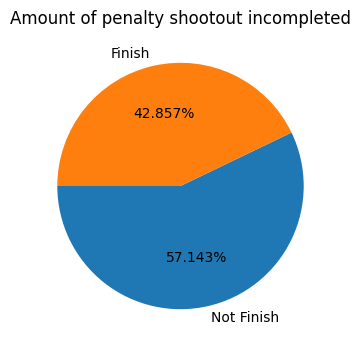

In [41]:
plt.figure(figsize=(8,4))
plt.title('Amount of penalty shootout incompleted')
plt.pie((not_finish,len(Penalty_History)-not_finish), labels=('Not Finish','Finish'), autopct='%1.3f%%', startangle=180);

Inferences and Conclusion
We have tried to show some an interesting outcomes from the the penalties shootouts throughout the World Cup since 1982 to 2022 following any features given for the data upload. We can summarize our study:

- There are more players right-footed than left-footed, and the first have a better success rate and the 'Zone 8' is increasingly chosen lately.

- Argentina has 6 of 7 matches won in this type of definitions but for Germany and Croatia are more effectives (4/4).

- The country which kick first has a slight disadvantage in opposition of the penalty shootout history.

- In overall it scores between 6 and 7 goals and the probability of complete a penalty shootout is 48% (To reach the tenth penalty) and it's odd have over two match points in each penalty shootout (just happened two times).

Thanks for reading and I appreciate the time that you take to make it!.

Note: This study could receive changes for its upgrade in the code. I'm not a native English speaker and wcould edit some mistakes.

### References

Links for reference:

https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts (Original dataset)

https://www.kaggle.com/datasets/luigibizarro/world-cup-penalty-shootouts-1982-2022

https://en.as.com/soccer/the-science-behind-penalty-shootouts-analysis-and-probabilities-of-penalty-kicks-n/

https://en.wikipedia.org/wiki/FIFA_World_Cup

https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project

https://jovian.com/luis-larm-88/world-cup-penalty-shootouts (Original project)